In [2]:
# general python packages:
from __future__ import division
from __future__ import print_function
import numpy as np

# custom modules:
from SSH.Computers import get_training_set, get_test_set
from SSH.MachineLearning import train_ANN
from SSH.Visualization import plot_curv_func, plot_test_ANN

# Create the data directory if it doesn't exist; the saving functions assume it exists
import os
os.makedirs("./data/SSH", exist_ok=True)

## Input parameters

In [3]:
t = 1.0                         # hopping
deltat_initial_training = -12   # initial value of the staggered hopping term for the training set
deltat_final_training = 12      # final value of the staggered hopping term for the training set
deltat_points_training = 1024   # number of points in the interval for the staggered hopping term for the training set
deltat_initial_testing = -1.0   # initial value of the staggered hopping term for the test set
deltat_final_testing = 1.0      # final value of the staggered hopping term for the training set
deltat_points_testing = 32      # number of points in the interval for the staggered hopping term for the test set

V_initial = -1.0    # initial value of the interaction strength for the test set
V_final = 1.0       # final value of the interaction strength for the test set
V_points = 32       # number of points in the interval for the interaction strength for the test set
random_flag = True  # flag to choose training set as a uniform random distribution in the given interval

# Parameter for plotting the curvature function:
N_k = 512           # number of points in the k-interval
k_left = 0          # left bound of the interval
k_right = 2*np.pi   # right bound of the interval
V_curv = 0.5        # value of the interaction strength
deltat_curv = 0.3   # value of the staggered hopping term

# Parameters of the neural network:
width = 10      # number of neurons in the hidden layer
epochs = 100    # length of the training in epochs
batch_size = 8  # batch size for the training
shuffle = True  # flag for shuffling the data during training

## Example of the curvature function


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Working on point (delta_t, V)=(0.3,0.5).
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

0.0 % of calculation of curvature function completed.
12.5 % of calculation of curvature function completed.
25.0 % of calculation of curvature function completed.
37.5 % of calculation of curvature function completed.
50.0 % of calculation of curvature function completed.
62.5 % of calculation of curvature function completed.
75.0 % of calculation of curvature function completed.
87.5 % of calculation of curvature function completed.


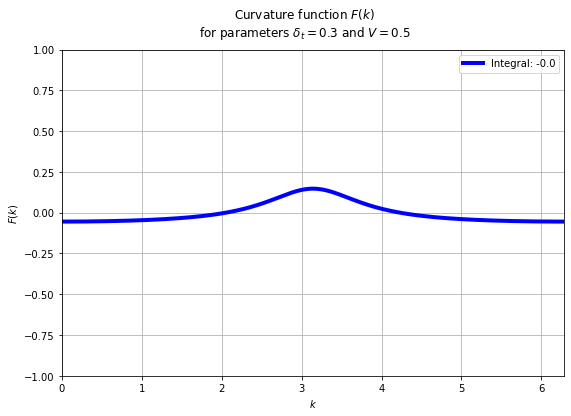

In [4]:
# Plot an example of the curvature function to show how it behaves:
plot_curv_func(t = t, deltat = deltat_curv, V = V_curv, k_left = k_left, k_right = k_right, N = N_k, load = False)

## Generate training data and save it to a file

In [5]:
curv_func_array_train, top_inv_array_train = get_training_set(t = t, deltat_initial = deltat_initial_training, deltat_final =  deltat_final_training, deltat_points =  deltat_points_training, random_flag = random_flag)

0.0 % of calculation of curvature function completed.
6.25 % of calculation of curvature function completed.
12.5 % of calculation of curvature function completed.
18.75 % of calculation of curvature function completed.
25.0 % of calculation of curvature function completed.
31.25 % of calculation of curvature function completed.
37.5 % of calculation of curvature function completed.
43.75 % of calculation of curvature function completed.
50.0 % of calculation of curvature function completed.
56.25 % of calculation of curvature function completed.
62.5 % of calculation of curvature function completed.
68.75 % of calculation of curvature function completed.
75.0 % of calculation of curvature function completed.
81.25 % of calculation of curvature function completed.
87.5 % of calculation of curvature function completed.
93.75 % of calculation of curvature function completed.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Data successfully generated.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!


## Preprocess data, define the neural network, and train it with the noninteracting data:

In [6]:
train_ANN(t = t, deltat_initial = deltat_initial_training, deltat_final = deltat_final_training, deltat_points = deltat_points_training, width = width, epochs = epochs, batch_size = batch_size, random_flag = random_flag, shuffle = shuffle, load = True)

train features: [[-0.41906434]
 [-0.07258404]
 [-0.22349535]
 ...
 [-0.10367093]
 [-0.06950525]
 [-0.0493427 ]]
train labels: [1. 0. 1. ... 1. 0. 0.]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
128/128 [==============================] - 1s 1ms/step - loss: 0.8050 - accuracy: 0.5078
Epoch 2/100
128/128 [==============================] - 0s 1ms/step - loss: 0.7017 - accuracy: 0.5078
Epoch 3/100
128/128 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5039
Epoch 4/100
128/128 [==============================] - 0s 1ms/step - 

128/128 [==============================] - 0s 1ms/step - loss: 0.4846 - accuracy: 1.0000
Epoch 73/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4811 - accuracy: 1.0000
Epoch 74/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.9961
Epoch 75/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4734 - accuracy: 1.0000
Epoch 76/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4698 - accuracy: 1.0000
Epoch 77/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 1.0000
Epoch 78/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 1.0000
Epoch 79/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4586 - accuracy: 1.0000
Epoch 80/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 1.0000
Epoch 81/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 

## Generate test set

In [8]:
curv_func_array_test = get_test_set(t = t, deltat_initial = deltat_initial_testing, deltat_final = deltat_final_testing, deltat_points = deltat_points_testing, V_initial = V_initial, V_final = V_final, V_points = V_points)

3.02734375 % of calculation of curvature function completed.
15.52734375 % of calculation of curvature function completed.
28.02734375 % of calculation of curvature function completed.
40.52734375 % of calculation of curvature function completed.
53.02734375 % of calculation of curvature function completed.
65.52734375 % of calculation of curvature function completed.
78.02734375 % of calculation of curvature function completed.
90.52734375 % of calculation of curvature function completed.


## Test the neural network with interacting data (prediction of the full phase diagram) and visualize the results:

(32, 32, 2)


/Users/paolomolignini/Dropbox/machine_learning_curvature/gitlab-repo/interacting-topological-insulators-ml/SSH/Visualization.py:382: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  contour1 = ax1.pcolormesh(X, Y, predictions_reshaped[:,:,0], cmap=cmaps.viridis)
/Users/paolomolignini/Dropbox/machine_learning_curvature/gitlab-repo/interacting-topological-insulators-ml/SSH/Visualization.py:391: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  contour2 = ax2.pcolorme

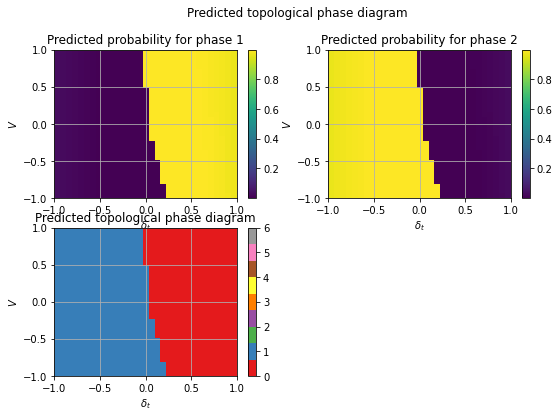

In [9]:
plot_test_ANN(t = t, deltat_initial_training = deltat_initial_training, deltat_final_training = deltat_final_training, deltat_points_training = deltat_points_training, deltat_initial = deltat_initial_testing, deltat_final = deltat_final_testing, deltat_points = deltat_points_testing, V_initial = V_initial, V_final = V_final, V_points = V_points, load = True, )